### Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from slpSGD import load_data

In [3]:
train_csv_path = 'normalized_diabetes_train.csv'
test_csv_path = 'normalized_diabetes_test.csv'
df_train = pd.read_csv(train_csv_path)
df_test = pd.read_csv(test_csv_path)

In [4]:
df_train.head()

,label,num_preg,PGC,DBP,tricept,insulin,BMI,ped_func,age
0,1,0.470588,0.758794,0.639344,0.507937,0.35,0.639344,0.187020,0.250000
1,1,0.235294,0.663317,0.000000,0.000000,0.00,0.490313,0.095645,0.033333
2,0,0.058824,0.467337,0.459016,0.174603,0.00,0.335320,0.144748,0.016667
3,0,0.058824,0.547739,0.311475,0.285714,0.20,0.344262,0.140478,0.083333
4,1,0.176471,0.869347,0.688525,0.523810,0.79,0.532042,0.076857,0.016667


In [5]:
X_train, y_train = load_data(df_train)
X_test, y_test = load_data(df_test)

In [6]:
X_train.shape

(500, 9)

In [7]:
X_train[0:5]

array([[1.        , 0.47058824, 0.75879397, 0.63934426, 0.50793651,
        0.35      , 0.63934426, 0.18701964, 0.25      ],
       [1.        , 0.23529412, 0.66331658, 0.        , 0.        ,
        0.        , 0.49031297, 0.09564475, 0.03333333],
       [1.        , 0.05882353, 0.46733668, 0.45901639, 0.17460317,
        0.        , 0.33532042, 0.14474808, 0.01666667],
       [1.        , 0.05882353, 0.54773869, 0.31147541, 0.28571429,
        0.2       , 0.34426229, 0.14047822, 0.08333333],
       [1.        , 0.17647059, 0.86934673, 0.68852459, 0.52380952,
        0.79      , 0.53204173, 0.07685739, 0.01666667]])

In [8]:
y_train.shape

(500,)

In [9]:
y_train[0:5]

array([1., 1., 0., 0., 1.])

### Plot sigmoid

In [10]:
from slpSGD import sigmoid

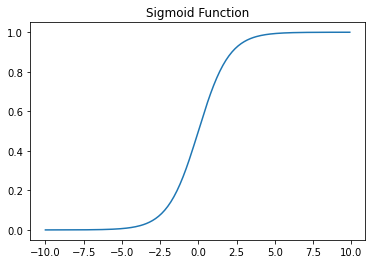

In [11]:
x = np.arange(-10, 10, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.title('Sigmoid Function')
plt.show()

### Training single layer neural net with SGD 

In [12]:
from slpSGD import SLPerceptron

In [13]:
iterations = 100000
rate = 0.1

In [14]:
slp = SLPerceptron(rate, iterations)
w = slp.fit(X_train, y_train)

In [15]:
print(w)

[-8.22808548  2.88145779  7.90979069 -1.1523313  -0.66394206 -0.49747614
  5.15199493  3.10317032 -0.42733111]


### Plot training error (average MSE for each epoch)

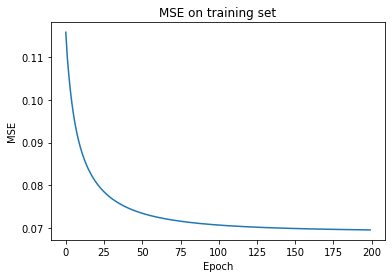

In [16]:
# plot average error over the number of iteration 
plt.plot(np.arange(len(slp.losses)), slp.losses)

plt.title('MSE on training set')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.show()

### Training and test accuracy

In [17]:
accuracy = slp.get_accuracy(X_train, y_train, w)
print(accuracy)

0.806


In [18]:
accuracy = slp.get_accuracy(X_test, y_test, w)
print(accuracy)

0.74


In [19]:
### Prediction using the model

In [20]:
X_new = np.array([[1, 0.10, 0.93, 0.54, 0.49, 0.45, 0.61, 0.18, 0.15],
                  [1, 0.12, 0.33, 0.55, 0.49, 0.11, 0.35, 0.07, 0.10],
                  [1, 0.31, 0.85, 0.59, 0.20, 0.13, 0.72, 0.12, 0.15]])
answer = slp.predict(X_new, w)
answer

array([1, 0, 1])